In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/kaggle/input/india-air-quality-data/data.csv",encoding="latin1")

data.columns

/tmp/ipykernel_55/2697961175.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/kaggle/input/india-air-quality-data/data.csv",encoding="latin1")


Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [30]:
x=data["no2"].dropna().values
r=102303184

ar= 0.05*(r%7)
br= 0.3*((r%5)+1)

In [31]:
z= x+ar*np.sin(br*x)

mean= np.mean(z)
variance= np.var(z)
lam = 1/(2*variance)
c= np.sqrt(lam/np.pi)

In [32]:
print("mean=",mean)
print("lambda=",lam)
print("c=",c)

mean= 25.81637541398808
lambda= 0.001461472898753684
c= 0.02156852503216156


In [33]:
p = c*np.exp(-lam*(z-mean)**2)
p

array([0.01952552, 0.01273138, 0.02137319, ..., 0.01273739, 0.00922548,
       0.01190806])

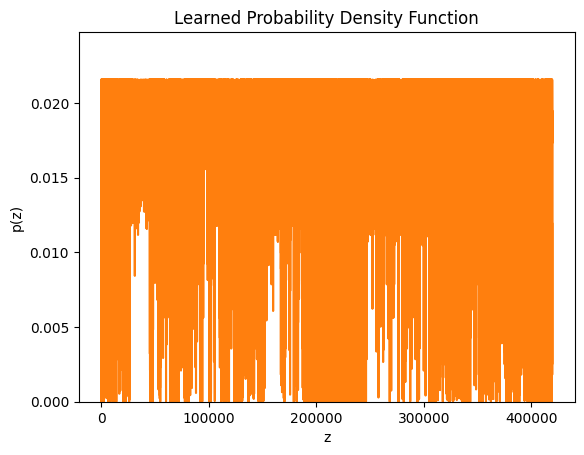

In [36]:
plt.hist(z, bins=30, density=True)
plt.plot(p)
plt.xlabel("z")
plt.ylabel("p(z)")
plt.title("Learned Probability Density Function")
plt.show()